In [8]:
import random
import string
import numpy as np
import matplotlib.pyplot as plt
from hllpp import *
from utils import *

# K-Anominity to Number of Unique Patients

holding total number of patients and other HLL parameters constant, in sparse only, then in dense only, using nodes and aggregator

In [2]:
K = 10
P = 10
P_PRIME = 25
N_HOSPITALS = 2

In [ ]:
p_non_k = []
h1_p_non_k = []
h2_p_non_k = []

for n_unique in range(1000, 9000, 1000):
    h1, h2 = get_hospital_hlls(10000, n_unique, N_HOSPITALS, P, P_PRIME)
    h1_p_non_k.append(h1.proportion_not_k_anonymous(K))
    h2_p_non_k.append(h2.proportion_not_k_anonymous(K))
    aggregator = HyperLogLogPlusPlus(P, P_PRIME)
    aggregator.aggregate(h1)
    aggregator.aggregate(h2)
    proportion = aggregator.proportion_not_k_anonymous(K)
    p_non_k.append(proportion)


575
582
254
837
835
744
933
933
912
977
971
966
993
984
1003
990
994
1016
995
1006
1019
1016
1009
1023


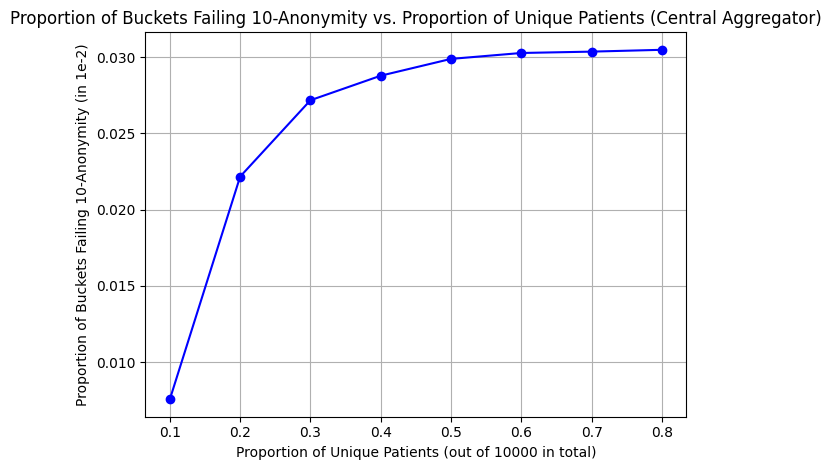

In [21]:
# plt.figure(figsize=(8, 5))
plt.plot(np.array(range(1000, 9000, 1000))/10000, np.array(p_non_k)*1000, marker='o', linestyle='-', color='b')
plt.title("Proportion of Buckets Failing 10-Anonymity vs. Proportion of Unique Patients (Central Aggregator)")
plt.xlabel("Proportion of Unique Patients (out of 10000 in total)")
plt.ylabel("Proportion of Buckets Failing 10-Anonymity (in 1e-2)")
plt.grid(True)
plt.tight_layout()
plt.show()

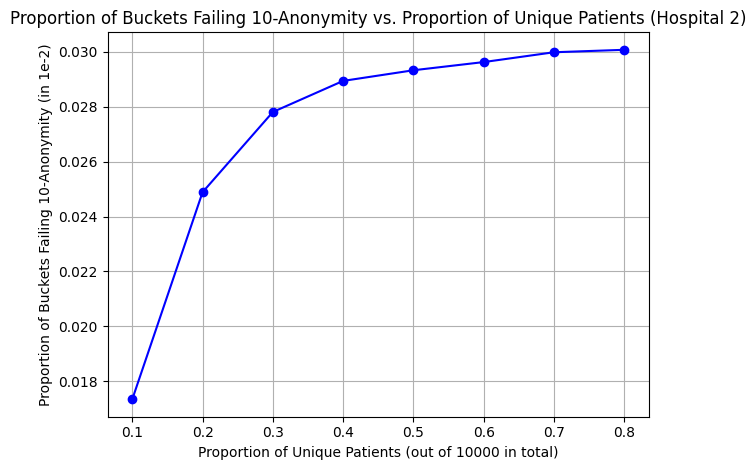

In [23]:
plt.plot(np.array(range(1000, 9000, 1000))/10000, np.array(h2_p_non_k)*1000, marker='o', linestyle='-', color='b')
plt.title("Proportion of Buckets Failing 10-Anonymity vs. Proportion of Unique Patients (Hospital 2)")
plt.xlabel("Proportion of Unique Patients (out of 10000 in total)")
plt.ylabel("Proportion of Buckets Failing 10-Anonymity (in 1e-2)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Removing Patient To See Distribution Change

In [97]:
p, p_prime = 14, 25
K=10
unique_patients_total = 6000
patients_total = 10000
patients_all = generate_patients_with_duplicates(unique_patients_total, patients_total, 10)

In [98]:
hllpp_original = HyperLogLogPlusPlus(p, p_prime)
for patient in patients_all:
    hllpp_original.add(patient)
original_p_non_k = hllpp_original.proportion_not_k_anonymous(K)
print(original_p_non_k)

1 [1, 1]
2 [2, 1, 2]
2 [2, 2]
1 [1, 1]
1 [1, 1]
1 [1]
2 [2, 2, 2]
1 [1, 1]
1 [1]
2 [2, 2, 2, 2, 2]
4 [4, 4]
3 [3, 3]
1 [1, 1, 1]
2 [2, 2, 2]
4 [4]
1 [1, 1]
3 [3, 3, 3, 3]
1 [1]
1 [1, 1]
1 [1, 1]
1 [1]
2 [2, 2]
7 [7, 3, 7]
2 [2, 2, 2]
1 [1, 1, 1, 1]
1 [1]
2 [2, 2]
3 [3]
1 [1]
2 [2]
3 [3]
1 [1, 1]
3 [2, 3, 2, 3]
2 [2]
3 [3, 3]
5 [5, 5, 5]
1 [1]
1 [1, 1, 1, 1, 1]
1 [1]
2 [2, 2]
3 [3, 3]
3 [3]
1 [1, 1]
1 [1]
2 [2]
1 [1, 1]
5 [5, 5]
4 [4]
3 [3, 3]
2 [2]
2 [2]
1 [1, 1]
4 [1, 1, 4]
1 [1, 1, 1, 1]
1 [1]
1 [1, 1]
1 [1, 1]
1 [1]
1 [1, 1]
2 [2]
1 [1, 1]
2 [2]
4 [4, 4]
1 [1, 1]
1 [1]
1 [1, 1]
3 [3]
2 [2, 2]
1 [1, 1]
3 [3, 3]
2 [2, 2, 2]
1 [1, 1]
4 [4, 1, 4]
1 [1, 1, 1]
1 [1]
1 [1]
3 [3, 3]
3 [3, 1, 3]
2 [2, 2, 2]
1 [1, 1]
3 [3, 3]
2 [2, 2]
2 [2, 2, 2]
1 [1]
1 [1, 1, 1]
2 [2]
1 [1, 1]
2 [2, 2]
1 [1]
4 [4, 4, 4]
3 [3, 3, 3]
2 [2, 1, 2]
1 [1, 1]
3 [3]
1 [1]
5 [1, 1, 1, 5]
1 [1]
1 [1, 1]
1 [1]
1 [1, 1]
1 [1]
1 [1]
1 [1]
2 [2, 2]
1 [1, 1, 1, 1, 1]
1 [1, 1]
2 [2]
4 [1, 1, 4, 1]
5 [5]
2 [2, 1, 2]
2 [2, 2

In [99]:
hllpp_original.mode
hllpp_original.estimate()

5965.355222131442

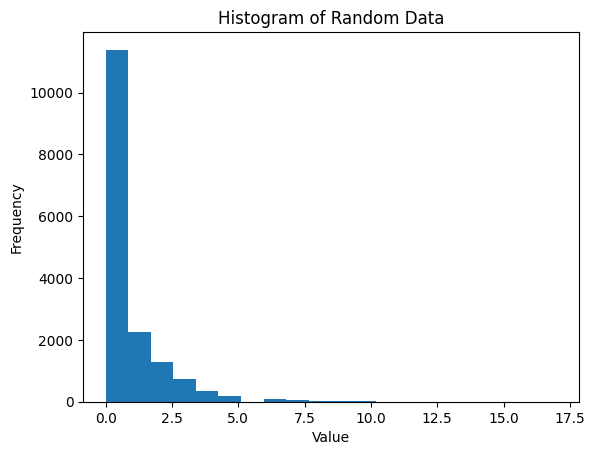

In [100]:
plt.hist(hllpp_original.registers, bins=20)  # `bins` sets the number of bins

# Add titles and labels
plt.title('Histogram of Random Data')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Show plot
plt.show()

In [101]:
patients_all_removed = [x for x in patients_all if x != 'W8f8CmeZfh']
# patients_all_removed.index('GPp9oJYfHf')
len(patients_all_removed)


10000

In [102]:
hllpp_removed = HyperLogLogPlusPlus(p, p_prime)
for patient in patients_all_removed:
    hllpp_removed.add(patient)
removed_p_non_k = hllpp_removed.proportion_not_k_anonymous(K)
print(removed_p_non_k)

1 [1, 1]
2 [2, 1, 2]
2 [2, 2]
1 [1, 1]
1 [1, 1]
1 [1]
2 [2, 2, 2]
1 [1, 1]
1 [1]
2 [2, 2, 2, 2, 2]
4 [4, 4]
3 [3, 3]
1 [1, 1, 1]
2 [2, 2, 2]
4 [4]
1 [1, 1]
3 [3, 3, 3, 3]
1 [1]
1 [1, 1]
1 [1, 1]
1 [1]
2 [2, 2]
7 [7, 3, 7]
2 [2, 2, 2]
1 [1, 1, 1, 1]
1 [1]
2 [2, 2]
3 [3]
1 [1]
2 [2]
3 [3]
1 [1, 1]
3 [2, 3, 2, 3]
2 [2]
3 [3, 3]
5 [5, 5, 5]
1 [1]
1 [1, 1, 1, 1, 1]
1 [1]
2 [2, 2]
3 [3, 3]
3 [3]
1 [1, 1]
1 [1]
2 [2]
1 [1, 1]
5 [5, 5]
4 [4]
3 [3, 3]
2 [2]
2 [2]
1 [1, 1]
4 [1, 1, 4]
1 [1, 1, 1, 1]
1 [1]
1 [1, 1]
1 [1, 1]
1 [1]
1 [1, 1]
2 [2]
1 [1, 1]
2 [2]
4 [4, 4]
1 [1, 1]
1 [1]
1 [1, 1]
3 [3]
2 [2, 2]
1 [1, 1]
3 [3, 3]
2 [2, 2, 2]
1 [1, 1]
4 [4, 1, 4]
1 [1, 1, 1]
1 [1]
1 [1]
3 [3, 3]
3 [3, 1, 3]
2 [2, 2, 2]
1 [1, 1]
3 [3, 3]
2 [2, 2]
2 [2, 2, 2]
1 [1]
1 [1, 1, 1]
2 [2]
1 [1, 1]
2 [2, 2]
1 [1]
4 [4, 4, 4]
3 [3, 3, 3]
2 [2, 1, 2]
1 [1, 1]
3 [3]
1 [1]
5 [1, 1, 1, 5]
1 [1]
1 [1, 1]
1 [1]
1 [1, 1]
1 [1]
1 [1]
1 [1]
2 [2, 2]
1 [1, 1, 1, 1, 1]
1 [1, 1]
2 [2]
4 [1, 1, 4, 1]
5 [5]
2 [2, 1, 2]
2 [2, 2

In [103]:
hllpp_added = HyperLogLogPlusPlus(p, p_prime)
patients_all_added = patients_all.copy()
patients_all_added.append('NiNiPiPiYa')
for patient in patients_all_added:
    hllpp_added.add(patient)
added_p_non_k = hllpp_added.proportion_not_k_anonymous(K)
print(added_p_non_k)

1 [1, 1]
2 [2, 1, 2]
2 [2, 2]
1 [1, 1]
1 [1, 1]
1 [1]
2 [2, 2, 2]
1 [1, 1]
1 [1]
2 [2, 2, 2, 2, 2]
4 [4, 4]
3 [3, 3]
1 [1, 1, 1]
2 [2, 2, 2]
4 [4]
1 [1, 1]
3 [3, 3, 3, 3]
1 [1]
1 [1, 1]
1 [1, 1]
1 [1]
2 [2, 2]
7 [7, 3, 7]
2 [2, 2, 2]
1 [1, 1, 1, 1]
1 [1]
2 [2, 2]
3 [3]
1 [1]
2 [2]
3 [3]
1 [1, 1]
3 [2, 3, 2, 3]
2 [2]
3 [3, 3]
5 [5, 5, 5]
1 [1]
1 [1, 1, 1, 1, 1]
1 [1]
2 [2, 2]
3 [3, 3]
3 [3]
1 [1, 1]
1 [1]
2 [2]
1 [1, 1]
5 [5, 5]
4 [4]
3 [3, 3]
2 [2]
2 [2]
1 [1, 1]
4 [1, 1, 4]
1 [1, 1, 1, 1]
1 [1]
1 [1, 1]
1 [1, 1]
1 [1]
1 [1, 1]
2 [2]
1 [1, 1]
2 [2]
4 [4, 4]
1 [1, 1]
1 [1]
1 [1, 1]
3 [3]
2 [2, 2]
1 [1, 1]
3 [3, 3]
2 [2, 2, 2]
1 [1, 1]
4 [4, 1, 4]
1 [1, 1, 1]
1 [1]
1 [1]
3 [3, 3]
3 [3, 1, 3]
2 [2, 2, 2]
1 [1, 1]
3 [3, 3]
2 [2, 2]
2 [2, 2, 2]
1 [1]
1 [1, 1, 1]
2 [2]
1 [1, 1]
2 [2, 2]
1 [1]
4 [4, 4, 4]
3 [3, 3, 3]
2 [2, 1, 2]
1 [1, 1]
3 [3]
1 [1]
5 [1, 1, 1, 5]
1 [1]
1 [1, 1]
1 [1]
1 [1, 1]
1 [1]
1 [1]
1 [1]
2 [2, 2]
1 [1, 1, 1, 1, 1]
1 [1, 1]
2 [2]
4 [1, 1, 4, 1]
5 [5]
2 [2, 1, 2]
2 [2, 2

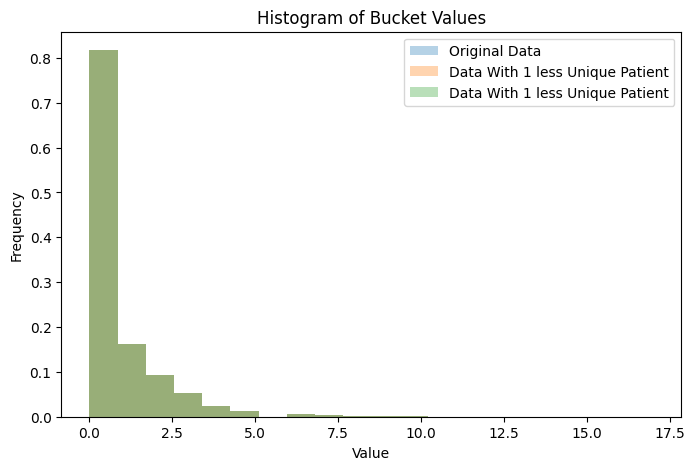

In [104]:
min_val = min(min(hllpp_removed.registers), min(hllpp_original.registers),min(hllpp_added.registers))
max_val = max(max(hllpp_removed.registers), max(hllpp_original.registers),max(hllpp_added.registers))

bin_edges = np.linspace(min_val, max_val, 20 + 1)
plt.figure(figsize=(8, 5))
plt.hist(hllpp_original.registers, bins=bin_edges, alpha=0.33, density=True, label='Original Data')
plt.hist(hllpp_removed.registers, bins=bin_edges, alpha=0.33, density=True, label='Data With 1 less Unique Patient')
plt.hist(hllpp_added.registers, bins=bin_edges, alpha=0.33, density=True, label='Data With 1 less Unique Patient')


plt.title('Histogram of Bucket Values')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

# Show plot
plt.show()

In [105]:
print(len(hllpp_original.registers))
print(len(hllpp_removed.registers))
print(hllpp_original.registers[:15])
print(hllpp_added.registers[:15])

16384
16384
[0 0 0 0 1 0 2 2 0 0 0 0 0 0 0]
[0 0 0 0 1 0 2 2 0 0 0 0 0 0 0]


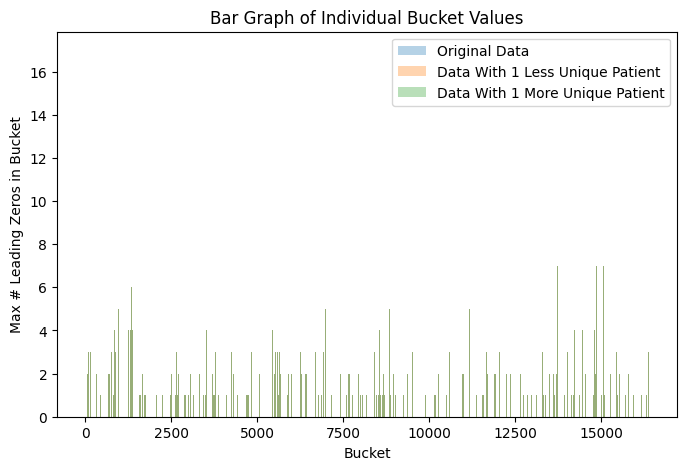

In [110]:
plt.figure(figsize=(8, 5))
plt.bar(range(len(hllpp_original.registers)),hllpp_original.registers, alpha=0.33, label='Original Data')
plt.bar(range(len(hllpp_removed.registers)),hllpp_removed.registers, alpha=0.33, label='Data With 1 Less Unique Patient')
plt.bar(range(len(hllpp_added.registers)),hllpp_added.registers, alpha=0.33, label='Data With 1 More Unique Patient')

# plt.bar(hllpp_removed.registers, bins=bin_edges, alpha=0.33, density=True, label='Data With 1 less Unique Patient')
# plt.bar(hllpp_added.registers, bins=bin_edges, alpha=0.33, density=True, label='Data With 1 less Unique Patient')


plt.title('Bar Graph of Individual Bucket Values')
plt.xlabel('Bucket')
plt.ylabel('Max # Leading Zeros in Bucket')
plt.legend()

# Show plot
plt.show()

In [107]:
hllpp_original.mode

'dense'

# How bucket size effects k-anonymity

In [111]:
unique_patients_total = 6000
patients_total = 10000
patients_all = generate_patients_with_duplicates(unique_patients_total, patients_total, 10)

In [ ]:
p_non_k_for_diff_p = []
for p in range(20, 30, 2):
    hllpp_original = HyperLogLogPlusPlus(p, 25)
    for patient in patients_all:
        hllpp_original.add(patient)
    original_p_non_k = hllpp_original.proportion_not_k_anonymous(K)
    print(hllpp_original.mode)
    p_non_k_for_diff_p.append(original_p_non_k)


In [129]:
p_non_k_for_diff_p

[0.947265625,
 0.5252685546875,
 0.16802978515625,
 0.04480743408203125,
 0.011379241943359375,
 0.002857208251953125,
 0.0007150173187255859,
 0.00017878413200378418]

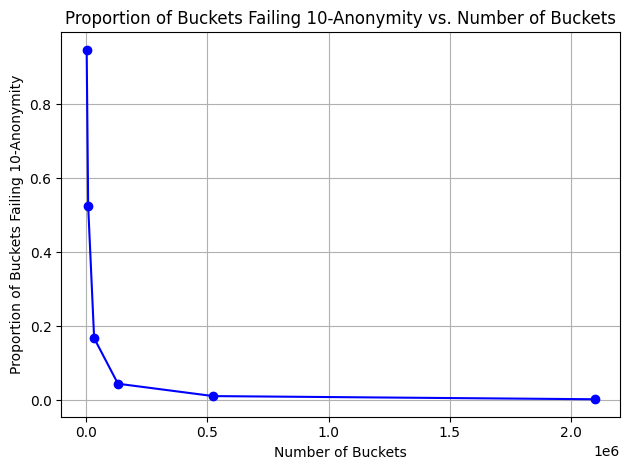

In [136]:
plt.plot(2**(np.array(range(11, 30, 2))[:6]), np.array(p_non_k_for_diff_p)[:6], marker='o', linestyle='-', color='b')
plt.title("Proportion of Buckets Failing 10-Anonymity vs. Number of Buckets")
plt.xlabel("Number of Buckets")
plt.ylabel("Proportion of Buckets Failing 10-Anonymity")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
unique_patients_total = 6000
patients_total = 10000
patients_all = generate_patients_with_duplicates(unique_patients_total, patients_total, 10)

node = HyperLogLogPlusPlus(p=14, p_prime=25)
for patient in patients_all:
    node.add(patient)

p_non_k = node.proportion_not_k_anonymous(K)
print(p_non_k)

estimated_num_unique = node.estimate()
print(estimated_num_unique)
